In [1]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../')

In [2]:
from PIL import Image
import torch
import numpy as np
import cv2
from typing import Union
import torch
import matplotlib.pyplot as plt

from src.drawing import draw_rotated_rect, draw_window
from src.image import get_image_tensor, get_numpy_image
from src.shape import Window, Position

In [3]:
img = Image.open('../data/image_1.png')
template_img = Image.open('../data/template_1.jpg')
cropped_template = template_img.crop((320, 60, 500, 220, ))

img_tensor = get_image_tensor(img)
template_tensor = get_image_tensor(template_img)

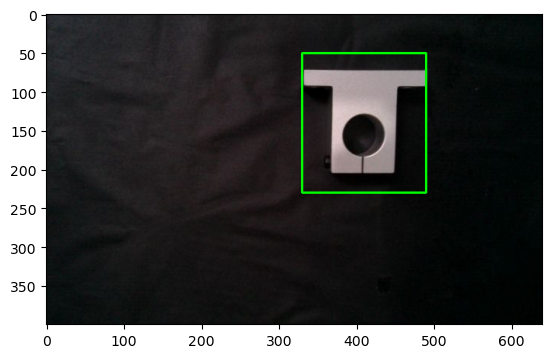

In [4]:
window = Window(410., 140., 180., 160., 0)
image = draw_window(np.asarray(template_img), window)
plt.imshow(image)

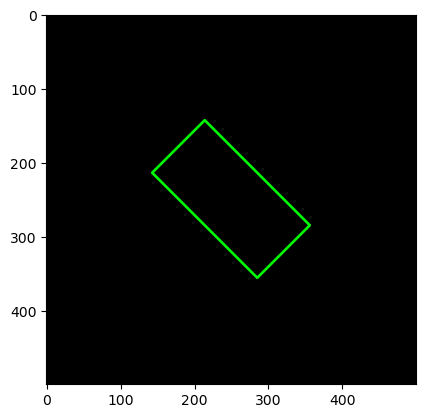

In [5]:
# Create an empty image
image = np.zeros((500, 500, 3), dtype='uint8')
# Test the function with a numpy array
image = draw_rotated_rect(image, np.array([[250, 250, 200, 100, 45]]))
plt.imshow(image)

In [6]:
def ltrba_to_cxcywha(ltrba: torch.Tensor, add_batch_dim: bool = True) -> torch.Tensor:
    cx = (ltrba[0] + ltrba[2]) / 2
    cy = (ltrba[1] + ltrba[3]) / 2
    w = ltrba[2] - ltrba[0]
    h = ltrba[3] - ltrba[1]
    a = ltrba[4]
    if add_batch_dim:
        return torch.tensor([[0, cx, cy, w, h, a]])
    else:
        return torch.tensor([cx, cy, w, h, a])

def add_batch_dim(tensor: torch.Tensor) -> torch.Tensor:
    zeros = torch.zeros(len(tensor), 1).to(tensor)
    return torch.cat([zeros, tensor], dim=1)

rbbox = np.array([320, 60, 500, 220, 0])
rois = ltrba_to_cxcywha(rbbox)
rois

tensor([[  0., 410., 140., 180., 160.,   0.]], dtype=torch.float64)

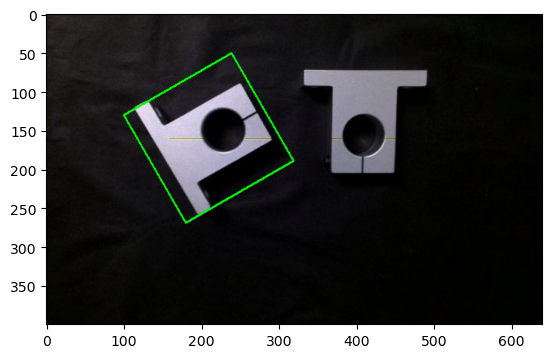

In [7]:
img = cv2.imread('../data/image_1.png')
rbbox = torch.tensor([210, 160, 160, 160, -30]).float()
img = draw_rotated_rect(np.asarray(img), rbbox)
plt.imshow(img)

(100, 100, 3)


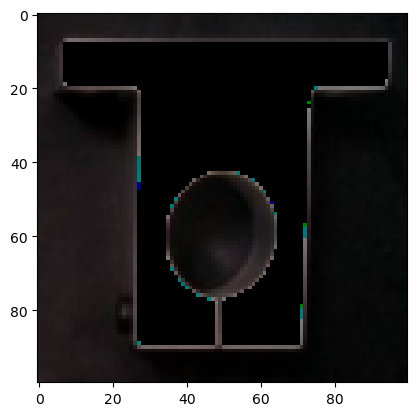

In [8]:
from detectron2.layers.roi_align_rotated import roi_align_rotated

spatial_scale = 1
output_size = (100, 100)
sampling_ratio = 2
roi_features = roi_align_rotated(template_tensor.float(), rois.float(), output_size, spatial_scale, sampling_ratio)
roi_features = get_numpy_image(roi_features).astype(np.int8)
print(roi_features.shape)
plt.imshow(roi_features)

(100, 100, 3)


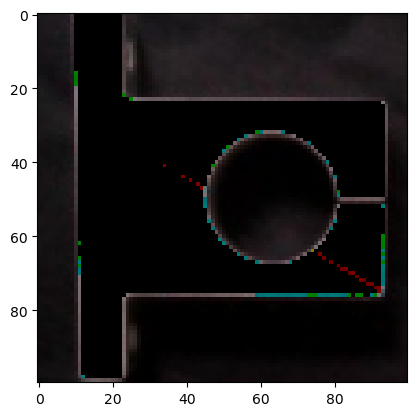

In [9]:
rbbox = torch.tensor([210, 160, 160, 160, 30]).float()
rbbox = add_batch_dim(rbbox[None])
roi_features = roi_align_rotated(img_tensor.float(), rbbox.float(), output_size, spatial_scale, sampling_ratio)
roi_features = get_numpy_image(roi_features).astype(np.int8)
print(roi_features.shape)
plt.imshow(roi_features)

In [10]:
from src.matcher import CnnMatcher, Window
from src.image import load_image
from src.feature_extractor import FeatureExtractor

template_img = load_image('../data/template_1.jpg')
window = Window(410., 140., 180., 160., 0)

model_name = 'tf_efficientnet_lite0'
feature_extractor = FeatureExtractor(model_name)

matcher = CnnMatcher(feature_extractor)
matcher.set_template(template_img, window)
position = matcher.find(template_img)

In [12]:
position

Position(cx=0.0, cy=0.0, angle=0.0)

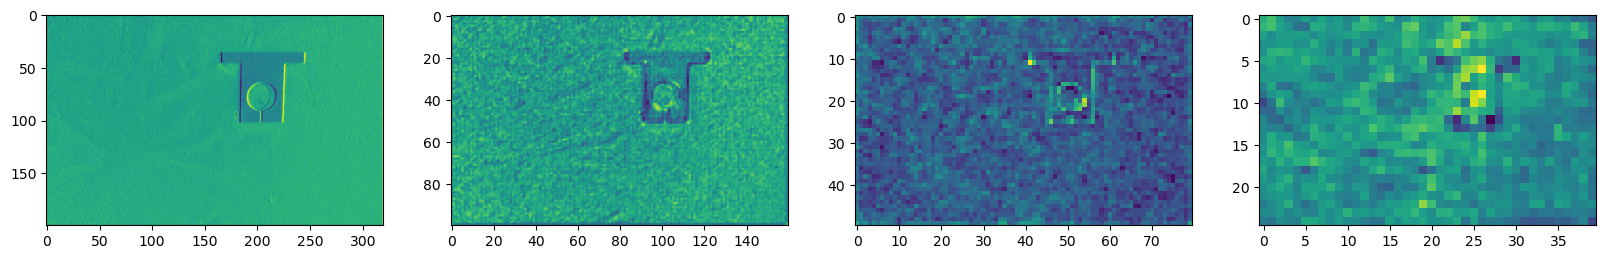

In [ ]:
feature_map.visualize()

In [ ]:
import urllib
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform


url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)
img = Image.open(filename).convert('RGB')
tensor = transform(img).unsqueeze(0) # transform and add batch dimension
feature_map = FeatureMap.from_outputs(model(tensor))
feature_map.visualize()

AssertionError: 

In [ ]:
feature_map = FeatureMap.from_outputs(model(tensor))
feature_map.visualize()

AssertionError: (773, 387, 194, 97)

In [ ]:
[x.shape for x in outputs]

[torch.Size([1, 16, 240, 320]),
 torch.Size([1, 24, 120, 160]),
 torch.Size([1, 40, 60, 80]),
 torch.Size([1, 112, 30, 40]),
 torch.Size([1, 320, 15, 20])]